In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [13]:
#变为dataclean的格式
#变意甲为的dataclean格式
yijia=pd.read_csv("yijia1.3-6.5yuanshi.csv")
datacleanyijia=yijia.iloc[:,[19,18,7,5,6,20,10,17,13,14,1,15,16,3,4,11,12,9]]
datacleanyijia.head()
#意甲加上比赛结果
datacleanyijia["result"]=datacleanyijia["HomeName"]
datanew=datacleanyijia["result"]
dataarray=np.array(datanew)
for i in range(0,len(datacleanyijia["HomeName"]),1):
    if datacleanyijia["HomeGoals"][i]>datacleanyijia["AwayGoals"][i]:
        dataarray[i]=2
    elif datacleanyijia["HomeGoals"][i]==datacleanyijia["AwayGoals"][i]:
        dataarray[i]=1
    else:
        dataarray[i]=0
dataarray=dataarray.astype(int)
dataarray
datacleanyijia["result"]=dataarray
datacleanyijia.head()
#保存意甲dataclean 并且加上了比赛结果的文件
datacleanyijia.to_csv("yijiaclean012.csv")

/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
#将意甲的比赛变为只有赔率和两个赛果
#or   datanew=pd.read_csv("dataclean.csv") 第一步是现只有赔率
datanew=datacleanyijia
datanew1=datanew.iloc[:,3:9]
datanew1["result"]=datanew["result"]
for i in range(7,14,1):
    datanew1[str(i)]=datanew1.iloc[:,1]
    datanew1.iloc[:,i]=1/datanew1.iloc[:,i-7]
datanew1=datanew1.iloc[:,0:13]
datanew1.head()
datanew1.columns=["chuwin","chudraw","chulose","win","draw","lose","reslut","chuwinp","chudrawp","chulosep","winp","drawp","losep"]


#去除异常值

for i in range(datanew1.index.max()):  
    if any([    
        datanew1.loc[i,'chudraw']>8,  
        datanew1.loc[i,'chulose']>8 ,  
        datanew1.loc[i,'win']>6.5,  
        datanew1.loc[i,'draw']>8,
        datanew1.loc[i,"lose"]>8,
        ]):  

        datanew1.drop([i],inplace=True) 
        
#处理只要赢就是1，输球和平球都是0.    
res=datanew1["reslut"]
#要改变dataframe一定要这样先转换为np.array
res=np.array(res)
for i in range(0,len(datanew1["reslut"]),1):
    if res[i]==2:
        res[i]=1
    elif res[i]==1:
        res[i]=0
datanew1["result1,0"]=res


#保存
datanew1.to_csv("yijiashanchu01.csv")

In [14]:
#变欧冠为的dataclean格式
ouguan=pd.read_csv("ouguan1.3-5.8yuanguan.csv")
datacleanouguan=ouguan.iloc[:,[19,18,7,5,6,20,10,17,13,14,1,15,16,3,4,11,12,9]]

#欧冠加上比赛结果
datacleanouguan["result"]=datacleanouguan["HomeName"]
datanew=datacleanouguan["result"]
dataarray=np.array(datanew)
for i in range(0,len(datacleanouguan["HomeName"]),1):
    if datacleanouguan["HomeGoals"][i]>datacleanouguan["AwayGoals"][i]:
        dataarray[i]=2
    elif datacleanouguan["HomeGoals"][i]==datacleanouguan["AwayGoals"][i]:
        dataarray[i]=1
    else:
        dataarray[i]=0
dataarray=dataarray.astype(int)
datacleanouguan["result"]=dataarray
#保存欧冠dataclean 并且加上了比赛结果的文件
datacleanouguan.to_csv("ouguanclean012.csv")

/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
#将欧冠的比赛变为只有赔率和两个赛果
#or   datanew=pd.read_csv("datacleanouguan.csv") 第一步是现只有赔率
#只需要改变第一步dataclean 输入的值就可以了  以及最后的输出
datanew=datacleanouguan
datanew1=datanew.iloc[:,3:9]
datanew1["result"]=datanew["result"]
for i in range(7,14,1):
    datanew1[str(i)]=datanew1.iloc[:,1]
    datanew1.iloc[:,i]=1/datanew1.iloc[:,i-7]
datanew1=datanew1.iloc[:,0:13]
datanew1.head()
datanew1.columns=["chuwin","chudraw","chulose","win","draw","lose","reslut","chuwinp","chudrawp","chulosep","winp","drawp","losep"]


#去除异常值

for i in range(datanew1.index.max()):  
    if any([    
        datanew1.loc[i,'chudraw']>8,  
        datanew1.loc[i,'chulose']>8 ,  
        datanew1.loc[i,'win']>6.5,  
        datanew1.loc[i,'draw']>8,
        datanew1.loc[i,"lose"]>8,
        ]):  

        datanew1.drop([i],inplace=True) 
        
#处理只要赢就是1，输球和平球都是0.    
res=datanew1["reslut"]
#要改变dataframe一定要这样先转换为np.array
res=np.array(res)
for i in range(0,len(datanew1["reslut"]),1):
    if res[i]==2:
        res[i]=1
    elif res[i]==1:
        res[i]=0
datanew1["result1,0"]=res


#保存
datanew1.to_csv("ouguanshanchu01.csv")

,StartTime,MatchId,ChuWin,ChuDraw,ChuLose,WinOdds,DrawOdds,LoseOdds,HomeGoals,HomeHalfGoals,AwayGoals,HomeName,HomeTeamId,AwayName,AwayTeamId,GameId,GameName,CorpId,result
0,/Date(1512677100000)/,2199246,1.40,4.50,7.5,1.65,4.1,5.75,1,0,2,布加勒星,577,卢加诺,1250,7,欧洲联赛,469,0
1,/Date(1512677100000)/,2199266,1.33,5.25,8.0,1.30,6.0,11.00,6,3,0,阿森纳,492,巴特,468,7,欧洲联赛,469,2
2,/Date(1512677100000)/,2199266,1.33,5.25,8.0,1.30,6.0,11.00,6,3,0,阿森纳,492,巴特,468,7,欧洲联赛,469,2
3,/Date(1512677100000)/,2199246,1.40,4.50,7.5,1.65,4.1,5.75,1,0,2,布加勒星,577,卢加诺,1250,7,欧洲联赛,469,0
4,/Date(1512669600000)/,2199224,1.57,3.75,6.0,1.75,3.7,5.50,2,0,0,哥本哈根,349,谢里夫,100,7,欧洲联赛,469,2


In [2]:
dataall=pd.read_csv("dataclean.csv")

In [7]:
#产生新变量赛果
dataall["result"]=dataall["HomeName"]
datanew=dataall["result"]
dataarray=np.array(datanew)
for i in range(0,len(dataall["HomeName"]),1):
    if dataall["HomeGoals"][i]>dataall["AwayGoals"][i]:
        dataarray[i]=2
    elif dataall["HomeGoals"][i]==dataall["AwayGoals"][i]:
        dataarray[i]=1
    else:
        dataarray[i]=0


In [ ]:
#在dataclean的基础上只有六个赔率的倒数以及六个赔率，以及胜利和其他。

In [32]:
datanew=pd.read_csv("dataclean.csv")
datanew1=datanew.iloc[:,3:9]
datanew1["result"]=datanew["result"]
for i in range(7,14,1):
    datanew1[str(i)]=datanew1.iloc[:,1]
    datanew1.iloc[:,i]=1/datanew1.iloc[:,i-7]
datanew1=datanew1.iloc[:,0:13]
datanew1.head()
datanew1.columns=["chuwin","chudraw","chulose","win","draw","lose","reslut","chuwinp","chudrawp","chulosep","winp","drawp","losep"]

In [33]:
datanew1.describe()

,chuwin,chudraw,chulose,win,draw,lose,reslut,chuwinp,chudrawp,chulosep,winp,drawp,losep
count,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000
mean,3.840145,3.869304,2.396576,4.210600,3.986236,2.506904,0.823723,0.320098,0.266527,0.516874,0.315393,0.260510,0.514012
std,1.543756,0.760805,1.576170,2.373395,0.879103,1.857305,0.853304,0.163416,0.044074,0.179572,0.174143,0.046420,0.193383
min,1.100000,2.500000,1.250000,1.030000,2.550000,1.020000,0.000000,0.153846,0.031250,0.043478,0.024390,0.062500,0.038462
25%,2.500000,3.400000,1.500000,2.500000,3.400000,1.500000,0.000000,0.200000,0.230947,0.384615,0.181818,0.230947,0.370370
50%,3.800000,3.750000,1.800000,3.800000,3.750000,1.830000,1.000000,0.263158,0.266667,0.555556,0.263158,0.266667,0.546448
75%,5.000000,4.330000,2.600000,5.500000,4.330000,2.700000,2.000000,0.400000,0.294118,0.666667,0.400000,0.294118,0.666667
max,6.500000,32.000000,23.000000,41.000000,16.000000,26.000000,2.000000,0.909091,0.400000,0.800000,0.970874,0.392157,0.980392


In [35]:
datanew1.head()

,chuwin,chudraw,chulose,win,draw,lose,reslut,chuwinp,chudrawp,chulosep,winp,drawp,losep
5,1.30,5.00,7.0,1.28,5.00,7.50,1,0.769231,0.200000,0.142857,0.781250,0.200000,0.133333
11,1.40,4.00,7.0,1.57,3.80,5.25,2,0.714286,0.250000,0.142857,0.636943,0.263158,0.190476
15,1.36,4.50,7.5,1.66,3.60,5.25,1,0.735294,0.222222,0.133333,0.602410,0.277778,0.190476
17,1.40,3.75,7.5,1.45,3.75,7.00,2,0.714286,0.266667,0.133333,0.689655,0.266667,0.142857
18,1.33,4.33,7.5,1.33,4.33,7.50,2,0.751880,0.230947,0.133333,0.751880,0.230947,0.133333


In [34]:
#去除异常值

for i in range(datanew1.index.max()):  
    if any([    
        datanew1.loc[i,'chudraw']>8,  
        datanew1.loc[i,'chulose']>8 ,  
        datanew1.loc[i,'win']>6.5,  
        datanew1.loc[i,'draw']>8,
        datanew1.loc[i,"lose"]>8,
        ]):  

        datanew1.drop([i],inplace=True) 
        


In [49]:
#处理只要赢就是1，输球和平球都是0.    
res=datanew1["reslut"]
#要改变dataframe一定要这样先转换为np.array
res=np.array(res)
for i in range(0,len(datanew1["reslut"]),1):
    if res[i]==2:
        res[i]=1
    elif res[i]==1:
        res[i]=0
datanew1["result1,0"]=res

In [50]:
datanew1.head()

,chuwin,chudraw,chulose,win,draw,lose,reslut,chuwinp,chudrawp,chulosep,winp,drawp,losep,"result1,0"
5,1.30,5.00,7.0,1.28,5.00,7.50,2,0.769231,0.200000,0.142857,0.781250,0.200000,0.133333,1
11,1.40,4.00,7.0,1.57,3.80,5.25,2,0.714286,0.250000,0.142857,0.636943,0.263158,0.190476,1
15,1.36,4.50,7.5,1.66,3.60,5.25,1,0.735294,0.222222,0.133333,0.602410,0.277778,0.190476,0
17,1.40,3.75,7.5,1.45,3.75,7.00,2,0.714286,0.266667,0.133333,0.689655,0.266667,0.142857,1
18,1.33,4.33,7.5,1.33,4.33,7.50,2,0.751880,0.230947,0.133333,0.751880,0.230947,0.133333,1


In [51]:
datanew1.to_csv("删除异常值1,0.csv")

array([1, 1, 0, ..., 0, 0, 0])

In [37]:
dataarray=dataarray.astype(int)
dataarray
dataall["result"]=dataarray

In [38]:
dataall.to_csv("dataclean.csv")
dataall.head(5)

,StartTime,MatchId,ChuWin,ChuDraw,ChuLose,WinOdds,DrawOdds,LoseOdds,HomeGoals,HomeHalfGoals,AwayGoals,AwayHalfGoals,HomeName,HomeTeamId,AwayName,AwayTeamId,GameId,GameName,CorpId,result
0,/Date(1511877600000)/,2221082,1.22,6.0,9.0,1.25,5.5,12.0,1,1,2,1,????,290,????,30608,207,????,469,0
1,/Date(1511877600000)/,2221082,1.22,6.0,9.0,1.25,5.5,12.0,1,1,2,1,????,290,????,30608,207,????,469,0
2,/Date(1511877600000)/,2221082,1.22,6.0,9.0,1.25,5.5,12.0,1,1,2,1,????,290,????,30608,207,????,469,0
3,/Date(1511868600000)/,2221090,1.16,7.0,11.0,1.20,7.0,11.0,9,4,0,0,????,430,???,1594,149,??,469,2
4,/Date(1511811900000)/,2177153,1.16,7.0,15.0,1.22,6.0,15.0,1,0,0,0,????,493,????,1392,1,??,469,2


In [17]:
import matplotlib.pyplot as plt

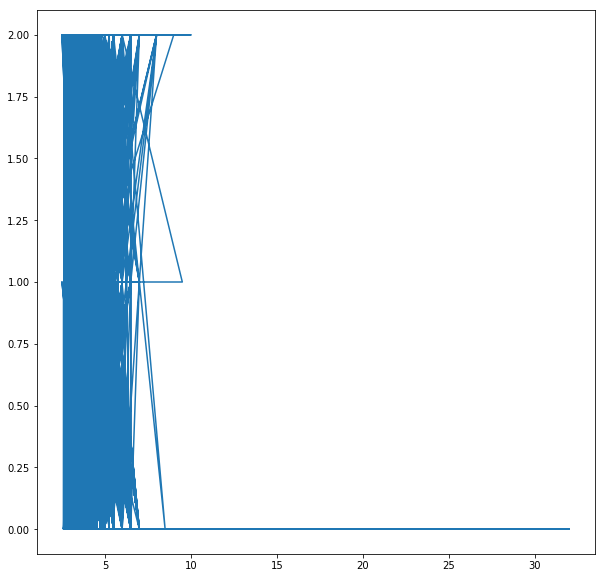

In [41]:
#线性分析
x=dataall["ChuDraw"]
y=dataall["result"]
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.show()

In [22]:
import scipy.stats as sps

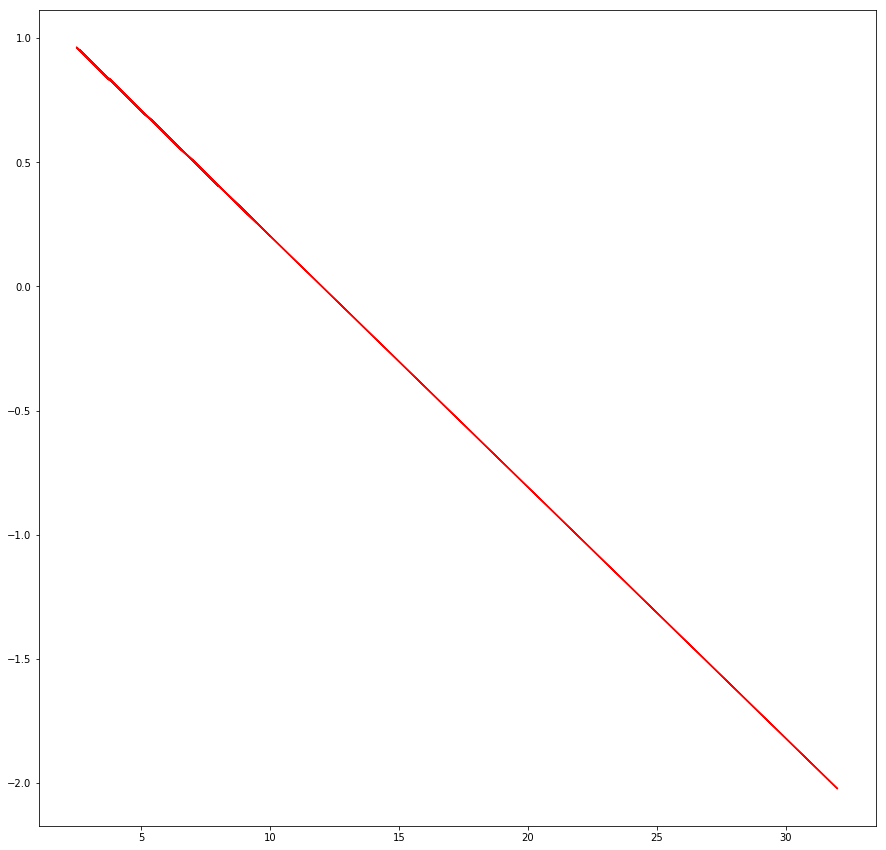

In [42]:
plt.figure(figsize=(15,15))
line=sps.linregress(x,y)
rline=plt.plot(x,x*line[0]+line[1],"r")
plt.show()

In [59]:
#计算主场赢球赔率为2（1.99-2.01）的胜率
win2=dataall[dataall["ChuWin"]<2.01]
win2=win2[win2["ChuWin"]>1.99]
cwin2=len(win2["ChuWin"])

winh2=win2[win2["result"]==2]
cwinh2=len(winh2["result"])

perh2=cwinh2/cwin2
perh2
print(cwin2)

443


In [113]:
#计算主场平球的概率
draw2=dataall[dataall["ChuDraw"]<3.5]
draw2=draw2[draw2["ChuDraw"]>3.3]
c2=len(draw2["ChuDraw"])

dh2=draw2[draw2["result"]==1]
cdh2=len(dh2["result"])

perh2=((cdh2/c2)/(1/3.4))
money=perh2-1
print(c2,cdh2,perh2,money)

2271 612 0.9162483487450461 -0.08375165125495387


In [71]:
draw2=dataall[dataall["ChuDraw"]<4.5]
draw2=draw2[draw2["ChuDraw"]>3.9]
c2=len(draw2["ChuDraw"])
c2

4672

In [9]:
odd=list()
winper=list()
winmoey=list()
drawper=list()
loseper=list()

In [10]:
#寻找最划算区间
for i in range(12,64,2):
    draw2=dataall[dataall["ChuDraw"]<((i+1)/10)]
    draw2=draw2[draw2["ChuDraw"]>((i-1)/10)]
    c2=len(draw2["ChuDraw"])
   
    dh2=draw2[draw2["result"]==1]
    cdh2=len(dh2["result"])
    
    if c2>0:
        per=cdh2/c2   
        r=(cdh2/c2)/(1/(i/10))
        money =r-1
    else:
        per=0

        money=0
        
    odd.append((i/10))
    winper.append(per)
    winmoey.append(money)
    
    
    
    
    
    

In [13]:
winmoey

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.3232876712328767,
 0.0034428794992176215,
 -0.13399280575539574,
 -0.026537216828478982,
 -0.08375165125495387,
 -0.07140186915887858,
 -0.11934533551554827,
 -0.08273834523309531,
 -0.017846153846153845,
 -0.06752618855761483,
 2.2857142857142856,
 -0.1788748564867968,
 -0.10518053375196235,
 0.56,
 0,
 0,
 2.8666666666666663,
 -0.029045643153526868,
 -1.0]

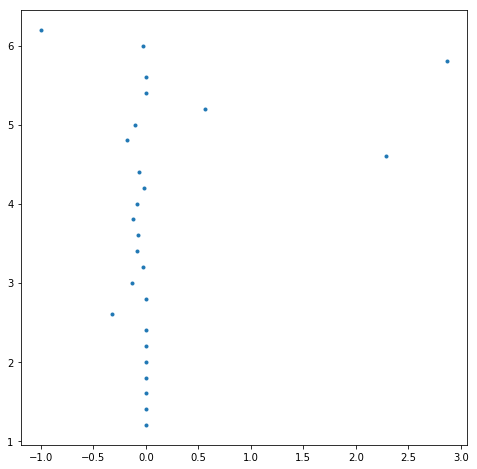

In [22]:
fig=plt.figure(1,figsize=(8,8))
plt.plot(winmoey,odd,".")
plt.show()

In [34]:
twin=np.array([odd,winmoey])
twin=pd.DataFrame(twin)
twin

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.600000,2.800000,3.000000,...,4.400000,4.600000,4.800000,5.000000,5.20,5.4,5.6,5.800000,6.000000,6.2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.323288,0.003443,-0.133993,...,-0.067526,2.285714,-0.178875,-0.105181,0.56,0.0,0.0,2.866667,-0.029046,-1.0


In [100]:
#
dataall["result"].value_counts()

0    12224
2     7617
1     6294
Name: result, dtype: int64

[3]
